In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_original import MCUOriginalModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [3]:
figure_num = 16 ** 3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
noise_level = 0
lw = np.array([10, -75, 0])
up = np.array([170, 75, 170])
param_names = np.array(["inside_angle", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)


In [ ]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

In [ ]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [ ]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level, pieces_cnt=10, test_data_size=20, same_value=False)

In [ ]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level, pieces_cnt=5, test_data_size=20, same_value=False, baseline=True)

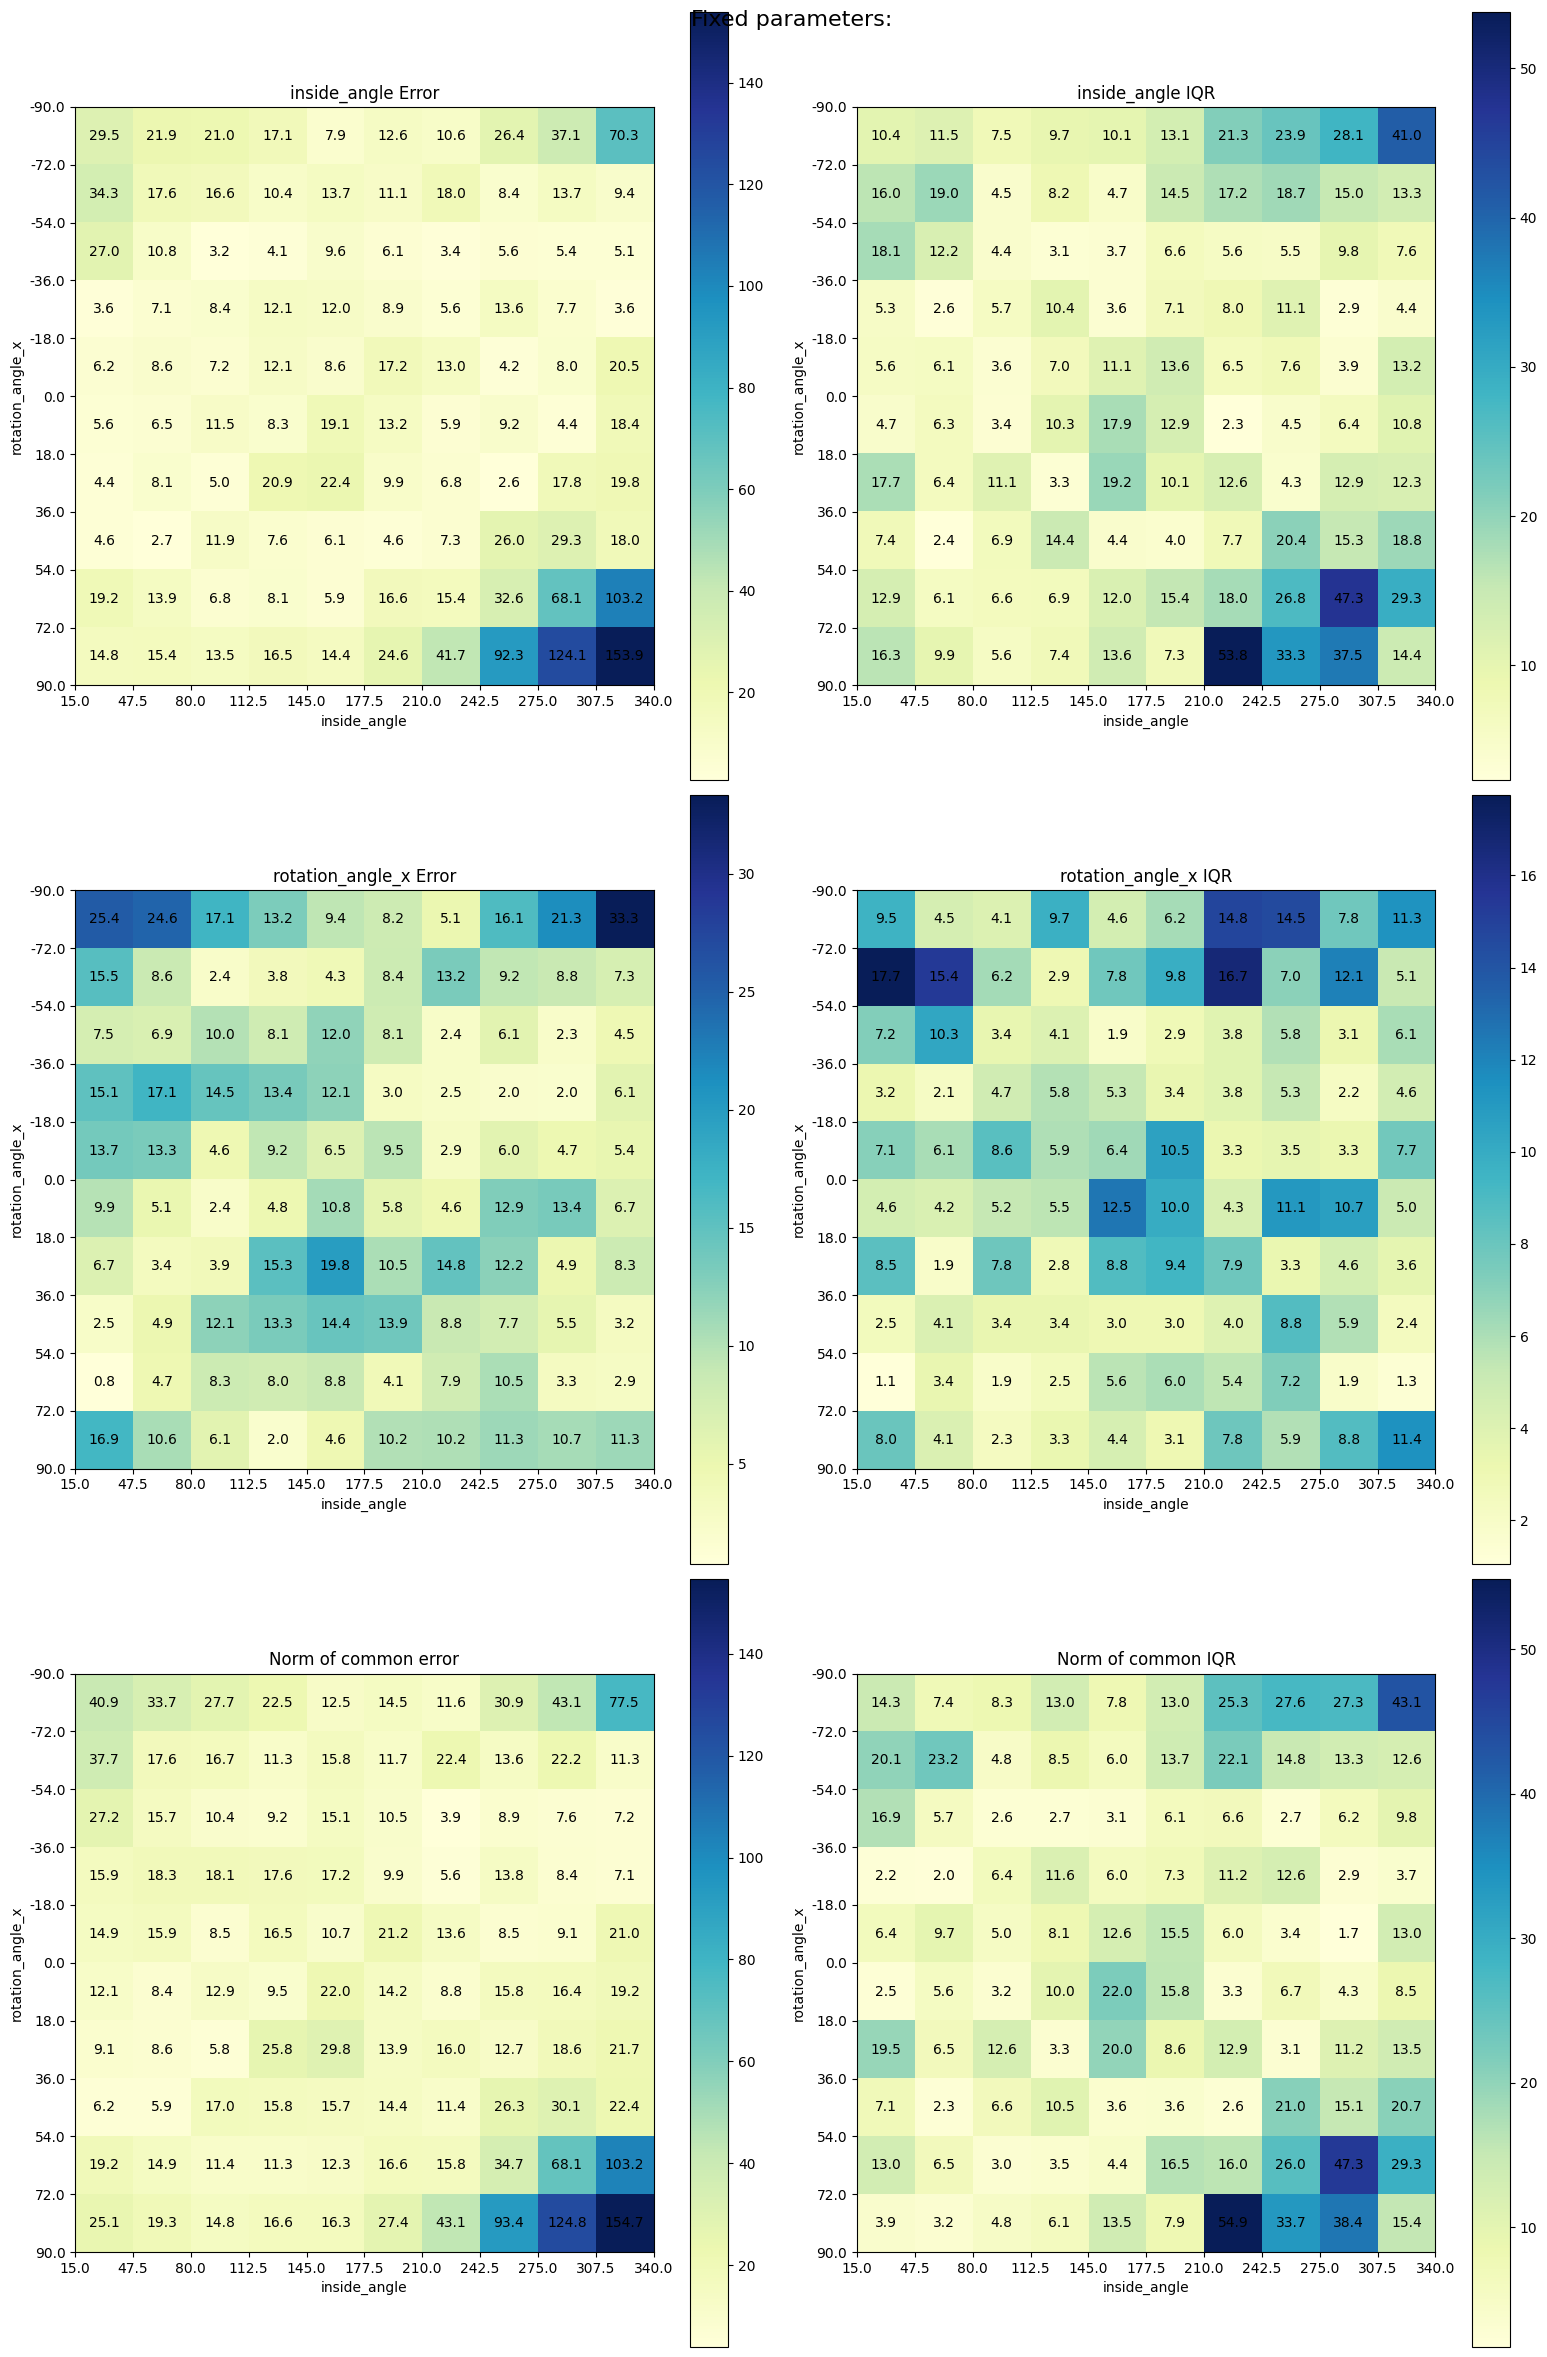

In [19]:
fixed_params_map={2:2}
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map=fixed_params_map, filename = f"images/orig_angle_3d_{fixed_params_map}.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, fixed_params_map=fixed_params_map, filename = f"images/orig_angle_3d_{fixed_params_map}_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, fixed_params_map=fixed_params_map, filename = f"images/orig_angle_3d_{fixed_params_map}_rel.png", title="Relation: Baseline / Optimization")